# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

# Coordinates transformation

In [2]:
# Cell dimensions
XCELL = 42.
ZCELL = 13.

# X coordinates translation
global_x_shifts = [994.2, 947.4,-267.4,-261.5,]

# Z coordinates translations
local_z_shifts = [z*ZCELL for z in range(0,4)]
global_z_shifts = [823.5, 0, 823.5, 0]

# Open file

This code opens 1 files, reads line by line and returns a list of floats for each line.

In [3]:
'''data_file = "../data/calibration/Run000260/data_000000.txt"
with open(data_file) as f:
    for line in f:
        event = line.split()
        event = [float(i) for i in event]
        print(event)'''

'data_file = "../data/calibration/Run000260/data_000000.txt"\nwith open(data_file) as f:\n    for line in f:\n        event = line.split()\n        event = [float(i) for i in event]\n        print(event)'

Let's just use 1 line, in order to test the code.

In [4]:
data_file = "D:/Desktop/University/Magistrale/Anno1_Sem1/LabOfComputationalPhysics/LabFiles/FinalProject/data_merged/calibration/Run000260.txt"
with open(data_file) as f:
    line = f.readline()
    line = f.readline()
    line = f.readline()

    event = line.split()
    #event = [float(i) for i in event]
    print(event)

['3', '0']


# Read data

- **Input**: 1 row of data_file.txt, e.g. 1 event, passed as a `list`
- **Output**: pandas dataframe as in the *Data Format* paragraph, Number of the Event, Number of hits in the Event

This function takes in input one event at time, and then outputs a pandas dataframe as described in the previous section. In addition, the transformation from local to global coordinates is performed.

In [5]:
def read_data(event):    
    event_number = int(event[0])
    hits_number  = int(event[1])
    if hits_number == 0:
        hit       = [np.nan]
        chamber   = [np.nan]
        layer     = [np.nan]
        xl_local  = [np.nan]
        xr_local  = [np.nan]
        z_local   = [np.nan]
        time      = [np.nan]
        xl_global = [np.nan]
        xr_global = [np.nan]
        z_global  = [np.nan]
    else:
        hit       = np.arange(hits_number)
        chamber   = np.fromiter((event[2+5*i] for i in range(hits_number)), int)
        layer     = np.fromiter((event[3+5*i] for i in range(hits_number)), int)
        xl_local  = np.fromiter((event[4+5*i] for i in range(hits_number)), float)
        xr_local  = np.fromiter((event[5+5*i] for i in range(hits_number)), float)
        z_local   = np.fromiter((local_z_shifts[i-1]+ZCELL/2 for i in layer), float)
        time      = np.fromiter((event[6+5*i] for i in range(hits_number)), float)
        xl_global = np.fromiter((global_x_shifts[i] for i in chamber), float) - xl_local
        xr_global = np.fromiter((global_x_shifts[i] for i in chamber), float) - xr_local
        z_global  = np.fromiter((global_z_shifts[i] for i in chamber), float) + z_local
    dataframe = pd.DataFrame(
        { 'EvNumber' : event_number,
          'Hit'      : hit,
          'Chamber'  : chamber,
          'Layer'    : layer,
          'XL_local' : xl_local,
          'XR_local' : xr_local,
          'Z_local'  : z_local,
          'Time'     : time,
          'XL_global': xl_global,
          'XR_global': xr_global,
          'Z_global' : z_global,
        })
    #dataframe.set_index('Hit', inplace=True) # set as index the number of the hit 
    return dataframe, event_number, hits_number

ev, evNumber, hits = read_data(event)
'''ev["WirePosition"] = abs(ev["XR_global"]-ev["XL_global"])/2
ev.groupby(["Chamber", "Layer"]).agg(np.nth)'''
ev, evNumber, hits

(   EvNumber  Hit  Chamber  Layer  XL_local  XR_local  Z_local  Time  \
 0         3  NaN      NaN    NaN       NaN       NaN      NaN   NaN   
 
    XL_global  XR_global  Z_global  
 0        NaN        NaN       NaN  , 3, 0)

# Wire position

In [6]:
from os import listdir

global_dataframe = pd.DataFrame()
dir_path = "D:/Desktop/University/Magistrale/Anno1_Sem1/LabOfComputationalPhysics/LabFiles/FinalProject/data_merged/calibration/"
for file_name in listdir(dir_path):
    data_file = dir_path+file_name
    with open(data_file) as f:
        for line in f:
            event = line.split()
            #event = [float(i) for i in event]
            dataframe, event_number, hits_number = read_data(event)
            global_dataframe = pd.concat([global_dataframe, dataframe])
global_dataframe["WirePosition"] = (global_dataframe["XR_global"] + global_dataframe["XL_global"])/2
global_dataframe
            
            


,EvNumber,Hit,Chamber,Layer,XL_local,XR_local,Z_local,Time,XL_global,XR_global,Z_global,WirePosition
0,1,0.0,0.0,4.0,165.500,170.50,45.5,45.8,828.700,823.70,869.0,826.2000
1,1,1.0,0.0,1.0,101.400,108.60,6.5,66.7,892.800,885.60,830.0,889.2000
2,1,2.0,0.0,2.0,113.000,139.00,19.5,241.7,881.200,855.20,843.0,868.2000
3,1,3.0,3.0,3.0,19.920,22.08,32.5,20.0,-281.420,-283.58,32.5,-282.5000
4,1,4.0,3.0,4.0,28.400,55.60,45.5,252.5,-289.900,-317.10,45.5,-303.5000
5,1,5.0,3.0,1.0,11.220,30.78,6.5,181.7,-272.720,-292.28,6.5,-282.5000
0,2,0.0,2.0,3.0,355.000,359.00,32.5,36.7,-622.400,-626.40,856.0,-624.4000
1,2,1.0,2.0,1.0,355.300,358.70,6.5,30.8,-622.700,-626.10,830.0,-624.4000
2,2,2.0,2.0,4.0,316.000,356.00,45.5,371.7,-583.400,-623.40,869.0,-603.4000
3,2,3.0,3.0,2.0,327.400,344.60,19.5,160.0,-588.900,-606.10,19.5,-597.5000


In [7]:
'''from scipy.signal import find_peaks

chamber = [i for i in range(4)]
layer   = [i for i in range(1,5)]

plt.figure()

for c in chamber:
    for l in layer:
        c_sort  = global_dataframe[global_dataframe["Chamber"] == c]
        cl_sort = c_sort[c_sort["Layer"] == l]
        print("Chamber", c, " - Layer", l)
        if c < 2 : r = (200, 1000)
        else: r = (-1000, 200)
        n, bins, _ = plt.hist(cl_sort["WirePosition"], bins=800, range=r)
        #plt.xlim(800, 850)
        plt.show()
        peaks, _ = find_peaks(x=n, height=100, distance=35)
        print(len(peaks))
        for i in peaks: print((bins[i]+bins[i+1])/2)'''
        
        

'from scipy.signal import find_peaks\n\nchamber = [i for i in range(4)]\nlayer   = [i for i in range(1,5)]\n\nplt.figure()\n\nfor c in chamber:\n    for l in layer:\n        c_sort  = global_dataframe[global_dataframe["Chamber"] == c]\n        cl_sort = c_sort[c_sort["Layer"] == l]\n        print("Chamber", c, " - Layer", l)\n        if c < 2 : r = (200, 1000)\n        else: r = (-1000, 200)\n        n, bins, _ = plt.hist(cl_sort["WirePosition"], bins=800, range=r)\n        #plt.xlim(800, 850)\n        plt.show()\n        peaks, _ = find_peaks(x=n, height=100, distance=35)\n        print(len(peaks))\n        for i in peaks: print((bins[i]+bins[i+1])/2)'

In [8]:
chamber = [i for i in range(4)]
layer   = [i for i in range(1,5)]

for c in chamber:
    for l in layer:
        c_sort  = global_dataframe[global_dataframe["Chamber"] == c]
        cl_sort = c_sort[c_sort["Layer"] == l]
        wires = cl_sort["WirePosition"].unique()
        print("Chamber", c, "- Layer", l, "-- #Wires =", len(wires))
        print(wires)
        

Chamber 0 - Layer 1 -- #Wires = 40
[889.2      343.2      385.2      511.2      637.2      595.2
 427.2      931.2      553.2      847.2      469.2      763.2
 805.2      679.2      889.22     721.2      973.2005   973.2
 889.21     973.199    973.198    889.215    889.19     889.205
 889.18     973.200435 973.1995   973.1985   973.2008   973.1975
 889.175    889.185    973.19845  889.185    889.215    973.1985
 973.2025   889.195    889.175    973.202   ]
Chamber 0 - Layer 2 -- #Wires = 21
[868.2   910.2   532.2   364.2   658.2   490.2   616.2   448.2   826.2
 322.2   742.2   700.2   952.2   910.21  784.2   910.175 910.185 910.175
 910.18  910.215 868.205]
Chamber 0 - Layer 3 -- #Wires = 41
[469.2     385.2     553.2     595.2     511.2     427.2     805.2
 343.2     889.2     721.2     931.2     973.2     973.1975  763.2
 889.175   889.205   973.199   973.1985  889.21    973.20115 889.215
 889.175   889.185   973.1995  973.1995  973.2005  889.195   973.201
 889.18    889.185   889.19

# Plot background

- **Input**: `None`
- **Output**: `list`\[pyplot `Axes`\] (global image + 4 detectors zooms)

The input of the function is the pandas dataframe made by the *Read Data* function. Five plots are given as output: one image of the whole detector, and one for each of the 4 chambers. In the images there will be the points of the hits tracked in the event (left/right positions must have different colors).

Instead of having 4 different 2D numpy arrays with the coordinates of the vertices of the 4 chambers, we create a pandas DataFrame with the following columns:

| chamber | x_vertices | y_vertices |
| --- | --- | --- |

where *x_vertices*, *y_vertices* contain a list with the four x/y coordinates of the 4 vertices of the chamber.

In [9]:
def plot_background():
    # create Pandas DataFrame for the cambers positions
    chamber_position = pd.DataFrame({
    'chamber' : [i for i in range(4)],
    'x_vertices' : [(global_x_shifts[i], global_x_shifts[i] - 720, global_x_shifts[i] - 720, global_x_shifts[i])
                    for i in range(4)],
    'y_vertices' : [(global_z_shifts[i], global_z_shifts[i], global_z_shifts[i] + 52, global_z_shifts[i] + 52)
                    for i in range(4)],
    })
    x_lim = [[-1000, 1000], # global detector
             [    0, 1000], # chamber 0
             [    0, 1000], # chamber 1
             [-1000,    0], # chamber 2
             [-1000,    0]] # chamber 3
    y_lim = [[-100, 1000],  # global detector
             [800 ,  900],  # chamber 0
             [ -25,   75],  # chamber 1
             [ 800,  900],  # chamber 2
             [ -25,   75]]  # chamber 3
    title = ["DETECTOR", "Chamber 0", "Chamber 1", "Chamber 2", "Chamber 3"]
    # create pyplot 'Axes' objects
    ax_global = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
    ax_0 = plt.subplot2grid(gridsize, (2, 1), colspan=1, rowspan=1) # top-right
    ax_1 = plt.subplot2grid(gridsize, (3, 1), colspan=1, rowspan=1) # bottom-right
    ax_2 = plt.subplot2grid(gridsize, (2, 0), colspan=1, rowspan=1) # top-left
    ax_3 = plt.subplot2grid(gridsize, (3, 0), colspan=1, rowspan=1) # bottom-left
    
    axes = [ax_global, ax_0, ax_1, ax_2, ax_3]
    for index, ax in enumerate(axes):
        ax.set_xlim(x_lim[index])
        ax.set_ylim(y_lim[index])
        ax.set_xlabel("x [mm]")
        ax.set_ylabel("z [mm]")
        if index == 0: ax.set_title(title[index])
        else: ax.set_title(title[index], pad=-20)
        # plot the 4 chambers in each 'Axes'
        for j in range(4):
            chamber = chamber_position[chamber_position["chamber"] == j]
            ax.fill(chamber["x_vertices"].values[0], chamber["y_vertices"].values[0], color='gray', fill=False)
    return axes
    

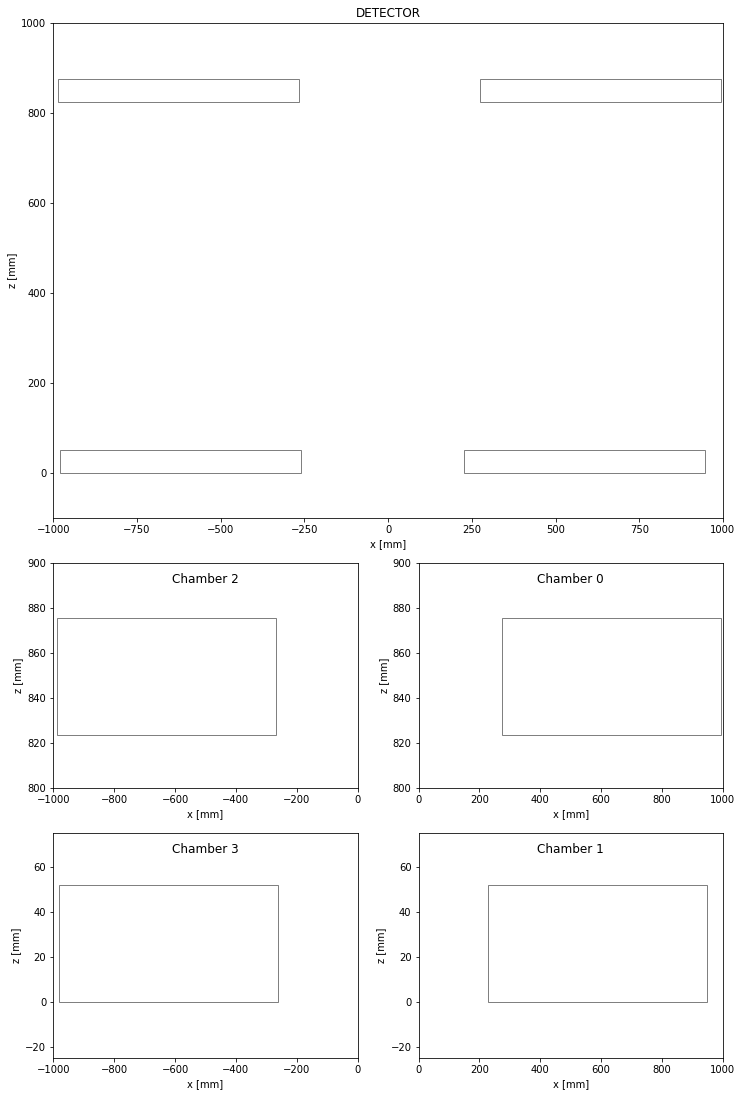

In [10]:
gridsize = (5, 2)
fig = plt.figure(figsize = (12, 24))
axes = plot_background()
plt.show()

# Plot events

- **Input**: Pandas `DataFrame` (1 event) + event number
- **Output**: `list`\[pyplot `Axes`\] (global image + 4 detectors zooms)

The input of the function is the Pandas `DataFrame` made by the *Read Data* function, and the event number (this is due to the fact that, if the are no hits, the `DataFrame` is empty, and therefore we can't get the Event number from that). Five plots are given as output: one image of the whole detector, and one for each of the 4 chambers. In the images there will be the points of the hits tracked in the event (left/right positions must have different colors).

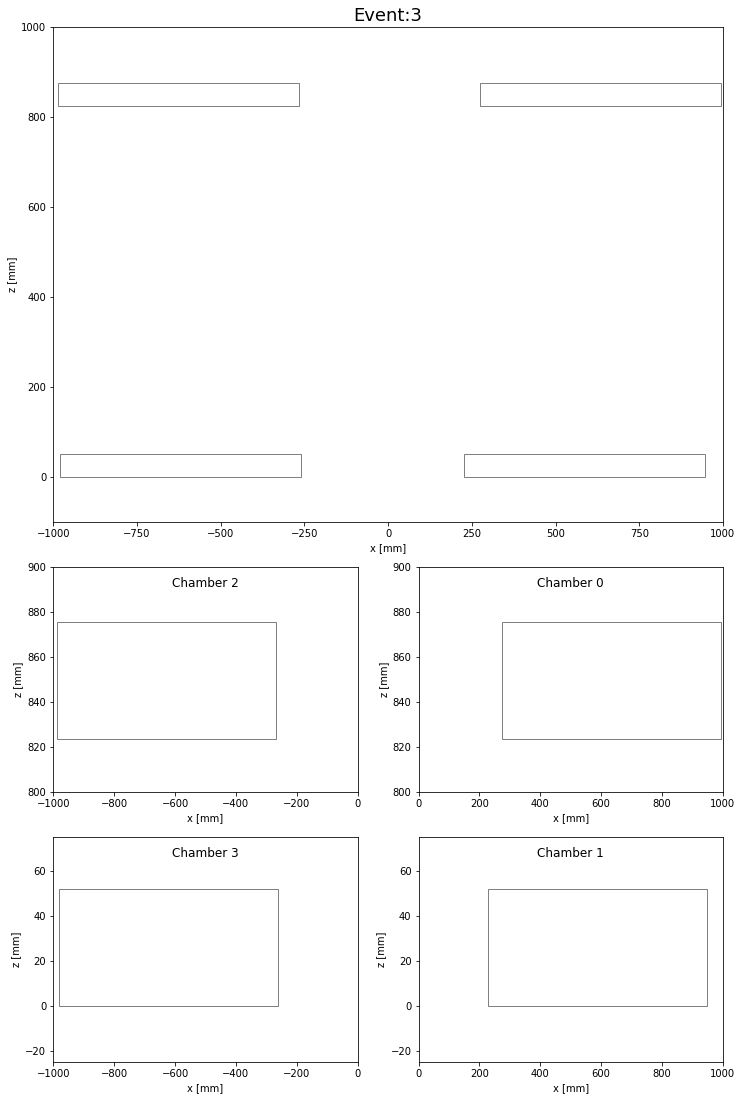

In [11]:
def plot_events(dataframe, evNumber):
    # get the EvNumber as argument, because, if the dataframe is empty,
    # I can't get it from data
    plots = plot_background()
    plots[0].set_title("Event:"+str(evNumber), {'size':'18'})
    if dataframe.empty == False:
        xL = dataframe["XL_global"]
        xR = dataframe["XR_global"]
        z  = dataframe["Z_global"]
        for index, image in enumerate(plots):     
            image.plot(xL, z, "bo", markersize=3)
            image.plot(xR, z, "ro", markersize=3)
    return plots

gridsize = (5, 2)
fig = plt.figure(figsize = (12, 24))
axes = plot_background()
axes = plot_events(ev, evNumber)
plt.show()